In [36]:
import pandas as pd

# Cargar los DataFrames
df_form = pd.read_json('dataframe_final_formulario.json', lines=True)
df_palas = pd.read_csv('df_scaled_palas.csv')

# Verificar si ambos DataFrames tienen el mismo número de filas
if len(df_form) == len(df_palas):
    # Verificar si 'Score_Escalar' existe en df_form
    if 'Score_Escalar' in df_form.columns:
        # Añadir la columna 'Score_Scalar' a df_palas
        df_palas['Score_Escalar'] = df_form['Score_Escalar'].values

        # Crear una copia del DataFrame actualizado
        df_palas_copia = df_palas.copy()

        # Mostrar el resultado
        print("Columna 'Score_Scalar' añadida correctamente:")
        print(df_palas_copia.head())
    else:
        print("La columna 'Score_Escalar' no existe en df_form.")
else:
    print("Los DataFrames no tienen el mismo número de filas.")
    # Ajustar los tamaños si es necesario
    min_rows = min(len(df_form), len(df_palas))
    df_form = df_form.iloc[:min_rows]
    df_palas = df_palas.iloc[:min_rows]

    # Añadir la columna después del ajuste
    if 'Score_Escalar' in df_form.columns:
        df_palas['Score_Escalar'] = df_form['Score_Escalar'].values
        df_palas_copia = df_palas.copy()
        print("Columna 'Score_Escalar' añadida después del ajuste:")
        print(df_palas_copia.head())
    else:
        print("La columna 'Score_Escalar' no existe en df_form.")


Los DataFrames no tienen el mismo número de filas.
Columna 'Score_Escalar' añadida después del ajuste:
                         Palas  Precio        Marca            Color  Balance  \
0              HARLEM EUPHORIA   63.95      No data     negro, verde        0   
1    VARLION LW DIFUSOR W 2021  149.95      varlion      negro, rosa        1   
2  DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown      negro, azul        1   
3    BLACK CROWN PITON 11 2023   86.95       dunlop             rosa        1   
4           SIUX FURTIVE PRO 2   62.95         siux  negro, amarillo        2   

   Nucleo  Cara  Dureza  Nivel de Juego  Forma  Superficie  Tipo de Juego  \
0       4     0       0               2      0           1              0   
1       4     0       0               2      1           2              0   
2       2     2       0               2      1           1              1   
3       4     1       1               1      1           2              1   
4       4     1       0  


Datos del registro seleccionado (índice 4):
                Palas Precio Marca            Color    Balance        Nucleo  \
4  SIUX FURTIVE PRO 2  62.95  siux  negro, amarillo  2 (medio)  4 (soft eva)   

                  Cara       Dureza Nivel de Juego        Forma Superficie  \
4  1 (fibra de vidrio)  0 (No data)   2 (avanzado)  2 (lágrima)   1 (lisa)   

  Tipo de Juego Jugador score_lesion score_nivel Score_Escalar  
4   0 (No data)   mixta     0.584615    0.557587      0.216418  


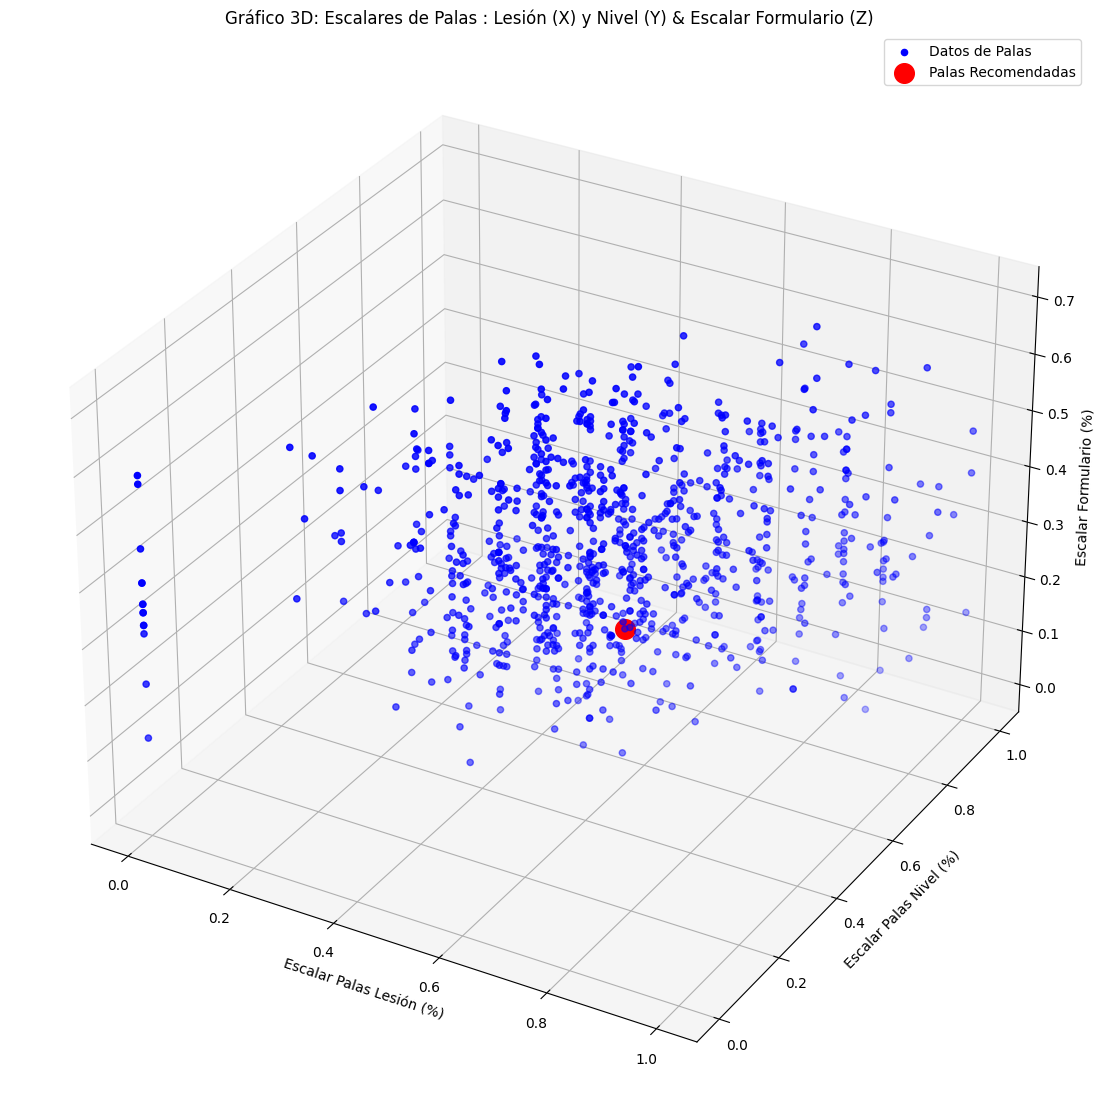


Resultados de los vecinos más cercanos:
                    Palas  score_lesion  score_nivel  Score_Escalar  Balance     Punto
WILSON PRO STAFF ELITE V2      0.584615     0.546618       0.164179        1 Punto 1.0
       SIUX FURTIVE PRO 2      0.584615     0.557587       0.216418        2 Punto 2.0
  DUNLOP SKIN ATTACK SOFT      0.596154     0.557587       0.298507        3 Punto 3.0


c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [16]:
 import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# Definir el diccionario de mapeo
label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
}

# Crear el mapeo inverso para convertir valores numéricos a etiquetas
mapeo_inverso = {columna: {v: k for k, v in mapeo.items()} for columna, mapeo in label_mapping.items()}

def seleccionar_fila(df_form, index=None):
    """
    Selecciona una fila específica del DataFrame de formulario según el índice proporcionado.
    """
    if index < 0 or index >= len(df_form):
        raise IndexError(f"El índice proporcionado ({index}) está fuera del rango del DataFrame (0 a {len(df_form) - 1}).")
    
    selected_row = df_palas_copia.iloc[index]
    
    # Mapear los valores numéricos a etiquetas descriptivas
    selected_row_mapeado = selected_row.copy()
    for columna in label_mapping.keys():
        if columna in selected_row.index:
            valor_numerico = selected_row[columna]
            etiqueta = mapeo_inverso[columna].get(valor_numerico, "No data")
            selected_row_mapeado[columna] = f"{valor_numerico} ({etiqueta})"
    
    print("\nDatos del registro seleccionado (índice {}):".format(index))
    print(selected_row_mapeado.to_frame().T)

    x = selected_row['score_lesion']
    y = selected_row['score_nivel']
    z = selected_row['Score_Escalar']

    return x, y, z

def crear_grafico_3d(df_palas_copia, x_random, y_random, z_random):
    """Crea un gráfico 3D con los datos de palas y formulario."""
    
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')

    x = df_palas_copia['score_lesion'] 
    y = df_palas_copia['score_nivel'] 
    z = df_palas_copia['Score_Escalar']

    ax.scatter(x, y, z, color='blue', label='Datos de Palas')
    ax.scatter(x_random, y_random, z_random,
               color='red', s=200, label='Palas Recomendadas')

    ax.set_xlabel('Escalar Palas Lesión (%)')
    ax.set_ylabel('Escalar Palas Nivel (%)')
    ax.set_zlabel('Escalar Formulario (%)')
    ax.set_title('Gráfico 3D: Escalares de Palas : Lesión (X) y Nivel (Y) & Escalar Formulario (Z)')
    ax.legend()

    plt.show()

def encontrar_vecino_mas_cercano(df_palas_copia: pd.DataFrame,
                                 x_random: float,
                                 y_random: float) -> pd.DataFrame:
    """
    Encuentra el vecino más cercano a cada punto de referencia utilizando kNN.

    Args:
        df_palas_copia (pd.DataFrame): DataFrame con los datos de las palas.
        x_random (float): Coordenada X del punto.
        y_random (float): Coordenada Y del punto.

    Returns:
        pd.DataFrame: DataFrame con los vecinos más cercanos en formato tabular.
    """
    
    # Crear puntos de referencia con coordenadas X e Y para cada Balance
    reference_points = pd.DataFrame({
        'score_lesion': [x_random] * 3,
        'score_nivel': [y_random] * 3,
        'Balance': [1.0, 2.0, 3.0]
    })

    # Preparar los datos del DataFrame de palas para aplicar kNN
    palas_data = df_palas_copia[['Palas', 'score_lesion', 'score_nivel', 'Score_Escalar', 'Balance']].copy()

    # Entrenar el modelo kNN con las columnas relevantes
    knn = NearestNeighbors(n_neighbors=1)  
    knn.fit(palas_data[['score_lesion', 'score_nivel', 'Balance']])

    # Encontrar el vecino más cercano para cada punto de referencia
    resultados_tabular = []
    
    for _, point in reference_points.iterrows():
        distances, indices = knn.kneighbors([point])  
        closest_point = palas_data.iloc[indices[0][0]].to_dict()
        closest_point['Punto'] = f'Punto {point["Balance"]}'
        resultados_tabular.append(closest_point)

    return pd.DataFrame(resultados_tabular)

if __name__ == "__main__":
    try:
        # Cargar los DataFrames desde archivos
        df_form = pd.read_json('dataframe_final_formulario.json', lines=True)
        df_palas = pd.read_csv('df_scaled_palas.csv')

        if len(df_form) != len(df_palas):
            min_rows = min(len(df_form), len(df_palas))
            df_form = df_form.iloc[:min_rows]
            df_palas = df_palas.iloc[:min_rows]

        if 'Score_Escalar' in df_form.columns:
            df_palas['Score_Escalar'] = df_form['Score_Escalar'].values
            df_palas_copia = df_palas.copy()
        else:
            raise KeyError("La columna 'Score_Escalar' no existe en df_form.")

        index = int(input("Introduzca un número de registro entre 1 y {}: ".format(len(df_form)))) - 1

        x_random, y_random, z_random = seleccionar_fila(df_form,
                                                        index=index)

        crear_grafico_3d(df_palas_copia,
                         x_random=x_random,
                         y_random=y_random,
                         z_random=z_random)

        # Obtener los vecinos más cercanos en formato tabular
        resultados_vecinos_df = encontrar_vecino_mas_cercano(df_palas_copia,
                                                             x_random=x_random,
                                                             y_random=y_random)

        print("\nResultados de los vecinos más cercanos:")
        print(resultados_vecinos_df.to_string(index=False))   # Mostrar como tabla usando pandas

    except ValueError as e:
        print(f"Error: {e}")

